## Create Latitude and Longitude Combinations

In [79]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy

In [80]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [81]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [82]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

## Get the City Weather Data

#### Import Dependencies, and Initialize an Empty List and Counters

In [83]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [84]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ddc114b26221886571a6d9338b01791


In [85]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8ddc114b26221886571a6d9338b01791&q=Boston


In [86]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [87]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop Through the List of Cities and Build the City URL. Loop through all the cities in the list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
     #   set_count += 1
     #   record_count = 1
    # Create endpoint URL with each city.
   # city_url = url + "&q=" + "i"


# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities
# and retrieve both the index, and the city from the list.


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
        # Run an API request for each of the cities.       
# Add a try-except block to our code to prevent the API request from stopping prematurely
# if the city_weather request isn't a valid response.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | general pico
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | okahandja
Processing Record 7 of Set 1 | hovd
Processing Record 8 of Set 1 | pangnirtung
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | plouzane
Processing Record 12 of Set 1 | ust-barguzin
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | oranjestad
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | tarudant
City not found. Skipping...
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | souillac
Processing Record

Processing Record 33 of Set 4 | xingcheng
Processing Record 34 of Set 4 | udachnyy
Processing Record 35 of Set 4 | samusu
City not found. Skipping...
Processing Record 36 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 37 of Set 4 | rio grande
Processing Record 38 of Set 4 | san patricio
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | tuatapere
Processing Record 43 of Set 4 | kiruna
Processing Record 44 of Set 4 | the valley
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | panaba
Processing Record 47 of Set 4 | thinadhoo
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | oreanda
City not found. Skipping...
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of S

Processing Record 15 of Set 8 | tulsipur
Processing Record 16 of Set 8 | marrakesh
Processing Record 17 of Set 8 | salina cruz
Processing Record 18 of Set 8 | cockburn town
Processing Record 19 of Set 8 | basco
Processing Record 20 of Set 8 | cabo san lucas
Processing Record 21 of Set 8 | kazanskaya
Processing Record 22 of Set 8 | gambo
Processing Record 23 of Set 8 | dali
Processing Record 24 of Set 8 | mookane
Processing Record 25 of Set 8 | bosobolo
Processing Record 26 of Set 8 | shitanjing
Processing Record 27 of Set 8 | eureka
Processing Record 28 of Set 8 | kendari
Processing Record 29 of Set 8 | dudinka
Processing Record 30 of Set 8 | nanga eboko
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | akola
Processing Record 33 of Set 8 | champerico
Processing Record 34 of Set 8 | buritizeiro
Processing Record 35 of Set 8 | bowen
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | harnosand
Processing Recor

Processing Record 3 of Set 12 | maraba
Processing Record 4 of Set 12 | naliya
Processing Record 5 of Set 12 | setaka
Processing Record 6 of Set 12 | krasnoselkup
City not found. Skipping...
Processing Record 7 of Set 12 | batticaloa
Processing Record 8 of Set 12 | tombouctou
Processing Record 9 of Set 12 | marck
Processing Record 10 of Set 12 | port macquarie
Processing Record 11 of Set 12 | fort nelson
Processing Record 12 of Set 12 | chumikan
Processing Record 13 of Set 12 | bodaybo
Processing Record 14 of Set 12 | san andres
Processing Record 15 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 16 of Set 12 | usukhchay
Processing Record 17 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 18 of Set 12 | pyshchug
Processing Record 19 of Set 12 | lekoni
Processing Record 20 of Set 12 | synya
Processing Record 21 of Set 12 | limoges
Processing Record 22 of Set 12 | suhindol
Processing Record 23 of Set 12 | magaria
Processing Record 24 of Set 12 | ne

In [88]:
# Tally the number of cities in the city_data array of dictionaries using the len() function.

print ("Number of cities in array of dictionaries = ", len( city_data))

Number of cities in array of dictionaries =  541



## Create a DataFrame of City Weather Data

In [89]:
# Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.24,64.00,83,69,4.00,ZA,2019-11-05 21:34:37
1,Bluff,-23.58,149.07,66.51,26,38,9.40,AU,2019-11-05 21:34:37
2,General Pico,-35.66,-63.75,83.44,11,0,6.69,AR,2019-11-05 21:34:37
3,Busselton,-33.64,115.35,48.00,69,28,6.31,AU,2019-11-05 21:34:37
4,Okahandja,-21.98,16.91,80.60,22,36,3.36,NA,2019-11-05 21:34:38
5,Hovd,63.83,10.70,28.00,78,100,5.82,NO,2019-11-05 21:34:38
6,Pangnirtung,66.15,-65.72,23.00,85,75,3.36,CA,2019-11-05 21:34:38
7,Albany,42.65,-73.75,55.40,62,90,6.15,US,2019-11-05 21:34:38
8,Kahului,20.89,-156.47,87.80,48,20,6.93,US,2019-11-05 21:30:25
9,Plouzane,48.38,-4.62,53.01,93,75,13.87,FR,2019-11-05 21:34:39


In [90]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

# Assign a new or the same DataFrame with new column order: df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2019-11-05 21:34:37,-34.42,19.24,64.00,83,69,4.00
1,Bluff,AU,2019-11-05 21:34:37,-23.58,149.07,66.51,26,38,9.40
2,General Pico,AR,2019-11-05 21:34:37,-35.66,-63.75,83.44,11,0,6.69
3,Busselton,AU,2019-11-05 21:34:37,-33.64,115.35,48.00,69,28,6.31
4,Okahandja,NA,2019-11-05 21:34:38,-21.98,16.91,80.60,22,36,3.36
...,...,...,...,...,...,...,...,...,...
536,Kurkino,RU,2019-11-05 21:36:53,53.42,38.66,48.33,85,0,15.48
537,Poum,MK,2019-11-05 21:36:53,41.28,20.71,59.00,72,20,13.87
538,Gorele,TR,2019-11-05 21:36:54,41.03,39.00,69.80,30,0,8.05
539,Aykhal,RU,2019-11-05 21:36:54,65.95,111.51,-13.01,83,0,2.24


In [91]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## Plot Latitude vs. Temperature


##### Get Data for Plotting 

In [92]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [93]:
# Convert the above JSON datestamp using the string format method, strftime() 
# and pass the formatting parameters for our date in parentheses.
import time

today = time.strftime("%x")
today

'11/05/19'

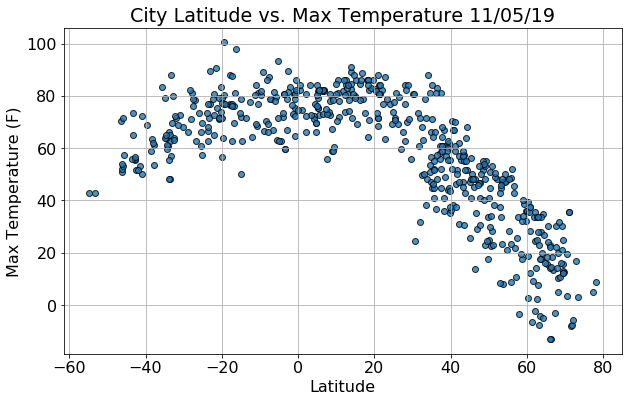

In [94]:
# Build the scatter plot for latitude vs. max temperature.
import matplotlib as mpl

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


## Plot Latitude vs. Humidity

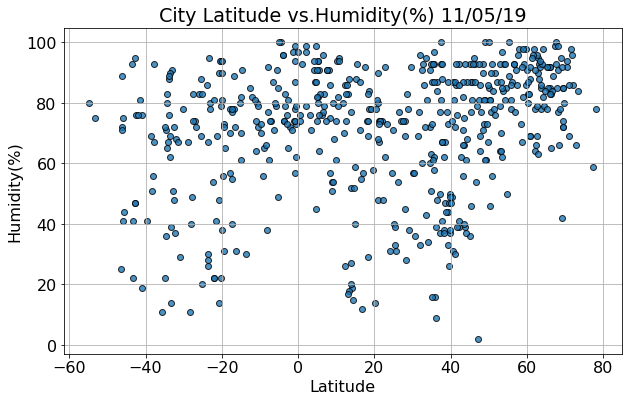

In [95]:
# Build the scatter plot for latitude vs. humidity.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity(%) "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


## Plot Latitude vs. Cloudiness

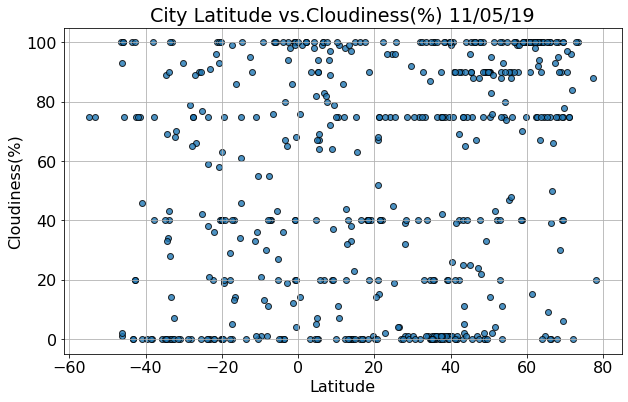

In [96]:
# Build the scatter plot for latitude vs. cloudiness.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

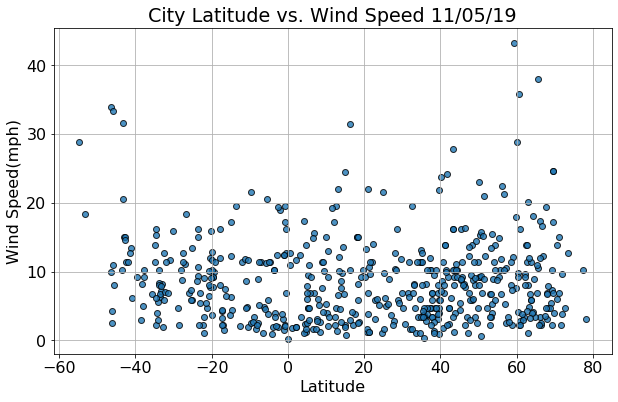

In [97]:
# Build the scatter plot for latitude vs. wind speed.

plt.subplots(figsize=(10, 6))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Change the default font size from 10 to 16.
mpl.rcParams['font.size'] = 16
# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()